In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import Q1

# Problem 1

To represent a cylinder in 3D space in a box, we can look at its cross sectional area and solve this problem in 2D since we know that the electric field and potential only depend on $\vec{r}$. Therefore, the behaviour around the cylinder will be the same everywhere along the z-axis. $\textbf{NOTE: electric field and potential are not normalized, behavior should be the same however.}$

Let's define the parameters of our problem below.

In [2]:
n = 1000             #Pixel size
R = 200              #Radius of cylinder
pot = 1              #Potential of the cylinder
maxIter = 10000      #Maximum iteration before relaxation method stops
thresh = 1e-2        #threshold in how precise we want the potential to be 

In [3]:
#Does the masking and initializes the boundary conditions
V,bc,mask,x,y = Q1.cylinder(n,R,pot)

#Calculates the expected potential
V_true = Q1.true_V(x,y,R,n,pot)

For the first problem, we are interested in solving this using the relaxation method. Below, I call the function in file Q1.py and display the results,

In [4]:
Q1.relaxation(V,bc,mask,maxIter=maxIter,thresh=thresh)
d = Q1.density(V,mask)

The relaxation method converged after 2184 iterations.This algorithm converged in 142.23988151550293s


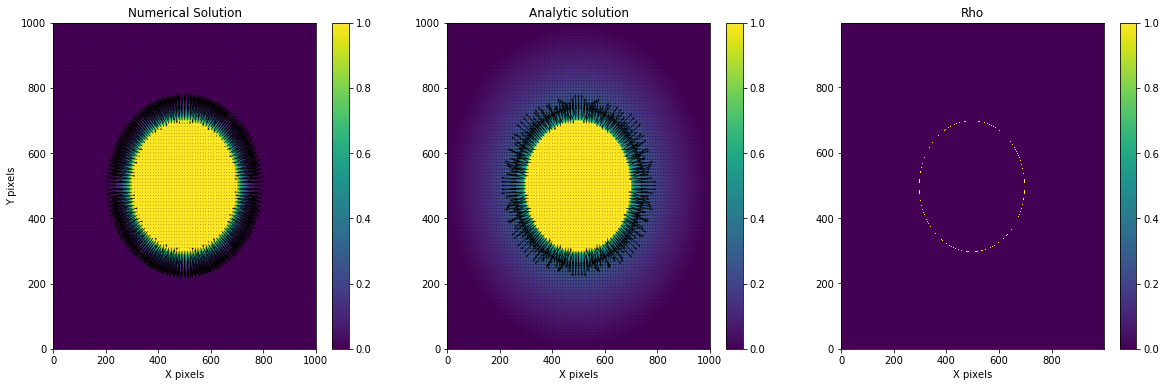

In [5]:
Q1.plot_three_results(V,V_true,d,10,x,y)

The electric field points outwards as expected. Moreover, the charge density is all on the boundary, as expected.

To get the charge per unit length, we can sum all the charge densities and divide by the circumference of the circle, 

In [7]:
charge_density = np.sum(d)/ (2*np.pi*R)
print (f"The charge per unit length was found to be {charge_density}")

The charge per unit length was found to be 1.2467460299557922


#### Overall comments: 

General behaviour of both the theoritical and simulated are very similar; both decay from the cylinder. That said, the electric field from the simulated is rougher and decays much faster than the analytic solution. This is because the simulated electric field has rougher variations (by-product of the relaxation method). This can be fixed using the conjugate gradient method, which is the next problem actually. 